<a href="https://colab.research.google.com/github/HowardHNguyen/Machine-Learning-Deep-Learning/blob/main/Supervised_Machine_Learning_Classification%2BRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MACHINE LEARNING / SUPERVISED LEARNING / CLASSIFICATION**

# **Naive Bayes Model**

Naive Bayes is a family of probabilistic algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. Despite its simplicity, Naive Bayes can often outperform more sophisticated classification methods.

# How Naive Bayes Works:
- Bayes’ Theorem: Naive Bayes classifiers utilize Bayes' theorem, which describes the probability of an event based on prior knowledge of conditions that might be related to the event.
- Feature Independence: The 'naive' aspect of the algorithm assumes that the presence or absence of a particular feature in a class is unrelated to the presence or absence of any other feature.

# When to Use Naive Bayes:
- Text Classification/Natural Language Processing (NLP): It is widely used for email spam filtering, sentiment analysis, and document categorization.
- Medical Diagnosis: Naive Bayes is used for predicting the probability of different diseases based on various symptoms.
- Real-time Prediction: Due to its simplicity, it is an excellent choice for making predictions in real-time.
- Multi-class Prediction: When the outcome to be predicted has multiple categories.

# Use Cases:
- Spam Detection: Classifying emails as spam or not spam based on word frequencies.
- Sentiment Analysis: Identifying sentiment in text data.
- Customer Classification: Determining likely customer segments based on buying behavior.

Here’s a basic example of using Naive Bayes for classifying the famous Iris dataset. We'll use the Gaussian Naive Bayes variant, which assumes that features follow a normal distribution.

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/data/Mall_Customers.csv')

In [41]:
# Take the 'Gender' is a categorical feature that needs encoding
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Select features and target
# Let's classify customers based on their 'Gender' using 'Age', 'Annual Income (k$)' and 'Spending Score (1-100)' as features
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = data['Gender']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Train the model
model = gnb.fit(X_train, y_train)

In [44]:
# Make predictions
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Generate and print the classification report
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

Accuracy: 0.60
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.86      0.69        21
           1       0.67      0.32      0.43        19

    accuracy                           0.60        40
   macro avg       0.62      0.59      0.56        40
weighted avg       0.62      0.60      0.57        40



# Application on 20 New Groups

In [21]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [22]:
# Load the 20 Newsgroups dataset (a popular text dataset)
data = fetch_20newsgroups()
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, random_state=42)
# Create a pipeline with CountVectorizer for feature extraction and MultinomialNB for classification
model = make_pipeline(CountVectorizer(), MultinomialNB())

In [25]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [26]:
# Predict the labels for the test set
y_pred = model.predict(X_test)

In [27]:
# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8345705196182397


In [28]:
# Classification report
print(metrics.classification_report(y_test, y_pred, target_names=data.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.92      0.94      0.93       117
           comp.graphics       0.65      0.84      0.73       138
 comp.os.ms-windows.misc       0.82      0.06      0.12       142
comp.sys.ibm.pc.hardware       0.55      0.83      0.66       145
   comp.sys.mac.hardware       0.96      0.69      0.80       157
          comp.windows.x       0.70      0.93      0.79       136
            misc.forsale       0.91      0.63      0.74       137
               rec.autos       0.90      0.91      0.91       164
         rec.motorcycles       0.93      0.88      0.91       155
      rec.sport.baseball       0.98      0.94      0.96       141
        rec.sport.hockey       0.96      0.97      0.97       136
               sci.crypt       0.76      0.97      0.85       156
         sci.electronics       0.80      0.79      0.80       144
                 sci.med       0.94      0.94      0.94       145
         

In this example:

 - We use the 20 Newsgroups dataset, a collection of approximately 20,000 newsgroup documents across 20 different categories.
 - We split the dataset into training and testing sets.
 - We create a pipeline consisting of CountVectorizer for converting text documents into a matrix of token counts and MultinomialNB for classification.
 - We train the model on the training data and evaluate its performance on the test data.
 - Finally, we print the accuracy and classification report containing precision, recall, and F1-score for each class.

This is a basic example to demonstrate the usage of Multinomial Naive Bayes for text classification. Depending on your specific use case, you may need to adjust the preprocessing steps, feature extraction methods, or hyperparameters to achieve optimal performance.

# **Decision Tree**

A Decision Tree is a machine learning model used for both classification and regression tasks. It works by splitting the data into subsets based on feature values, with each split aimed at making the subsets as homogeneous as possible with respect to the target variable. This process results in a tree-like model of decisions.

# How It Works:
 - Nodes: Represent tests on features to split the data.
 - Edges: Outcome of the test leading to further splits or to leaves.
 - Leaves: Terminal nodes that predict the outcome (for classification) or the mean/mode (for regression).

# When to Use Decision Trees:
 - Interpretability: When you need a model that is easy to explain and understand.
 - Handling Non-linear Relationships: They can capture non-linear relationships and interactions between features.
 - Mixed Data Types: They handle both numerical and categorical data.
 - Missing Values: Some implementations are robust to missing data.

# Use Cases:
 - Medical Diagnosis: Predicting the type of disease based on symptoms.
 - Customer Segmentation: Grouping customers based on buying behavior.
 - Fraud Detection: Identifying potentially fraudulent transactions.

# Sample Python Code:
For customer segmentation on the Mall_Customers.csv dataset, we'll apply approach. Here are the steps we'll take:

 - Load and Explore the Data: Understand the features available in the dataset.
- Preprocess the Data: Handle missing values, and convert categorical data if needed.
 - Train a Decision Tree Classifier: Use the decision tree to segment customers based on their features.
 - Evaluate and Visualize the Tree: Check how the model performs and visualize the decision tree.

The Mall_Customers.csv has the following columns: CustomerID, Gender, Age, Annual Income (k$), and Spending Score (1-100). We'll segment customers based on Age, Annual Income (k$), and Spending Score (1-100).

I will now demonstrate this with a code example. Note that this is a basic segmentation; further refinements can be done based on the results and business requirements.

Here's the Python code to achieve this:

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/Mall_Customers.csv')

In [13]:
# Preprocess the data
# Encode the 'Gender' column if used
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [14]:
# Select features and target for segmentation
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = df['Gender']  # or any other categorical variable if segmentation is different

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=5)

In [19]:
# Train the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

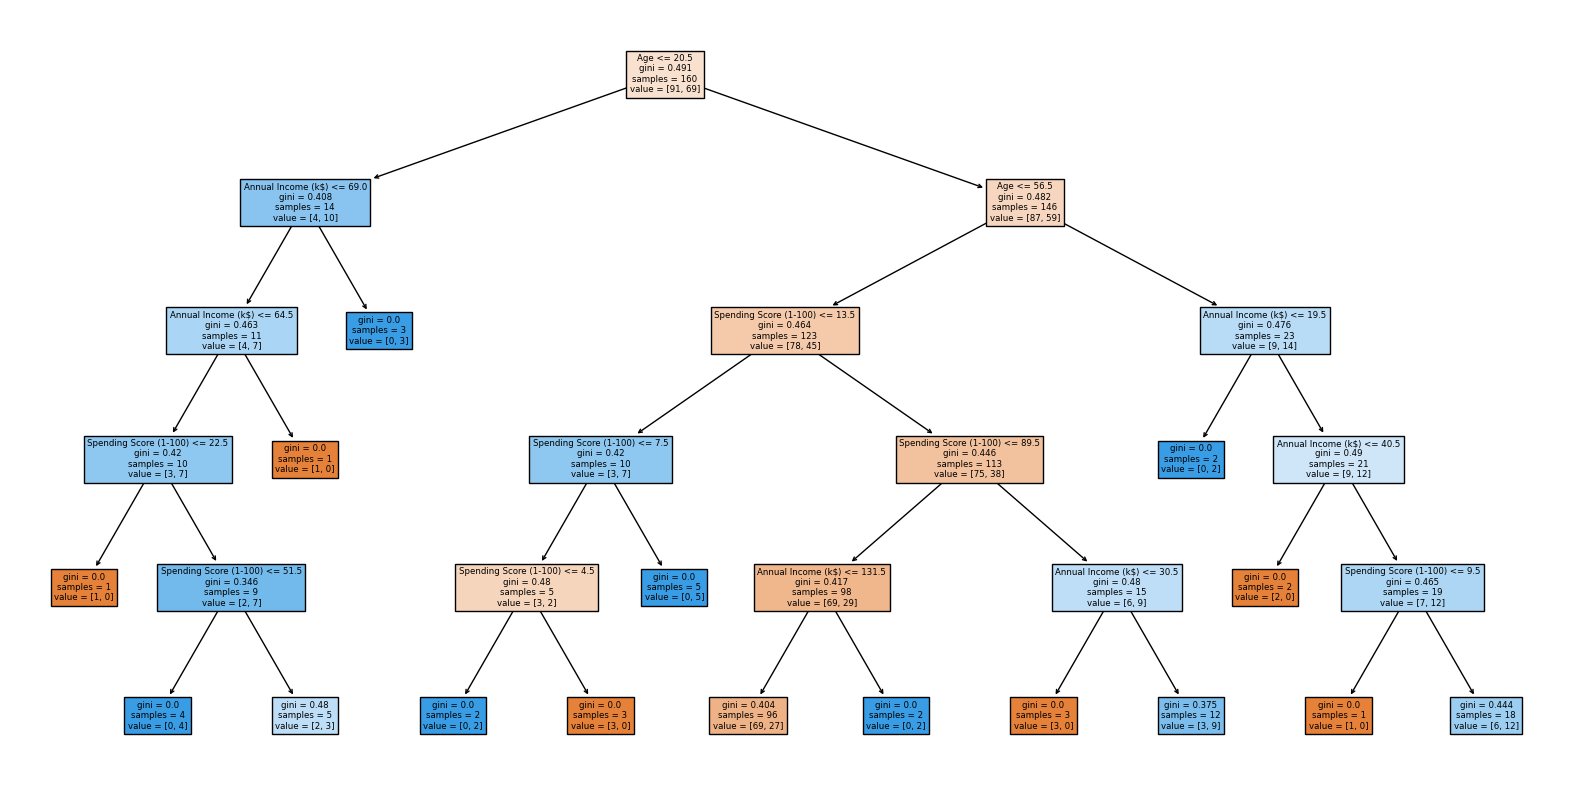

In [20]:
# plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns)
plt.show()

# Overview of the Tree
- The tree splits based on three main features: Age, Annual Income (k$), and Spending Score (1-100).
- It starts at the root with a condition on Age and continues to split mainly on Spending Score and Annual Income.

# Key Segments and Observations

1- Root Node Split on Age:

- Left Child (Age <= 20.5): This node indicates a younger demographic. The tree does not split further for these individuals, suggesting consistent behavior within this age group in terms of spending and income.
- Right Child (Age > 20.5): Represents older age groups and is further subdivided based on spending score and income, indicating more variability in behavior among older customers.

2- Further Splits on Spending Score and Annual Income:

- Low Spending Score (Spending Score <= 13.5): This group seems to include individuals with both low and high annual incomes, suggesting that low spenders aren't necessarily low earners.
- High Spending Score (Spending Score > 13.5): Subdivided into higher and lower income groups, suggesting different types of spending behaviors even among those with similar spending scores.

3- Detailed Subdivisions:

- Very High Spending Scores (Spending Score > 89.5): These individuals are further divided based on their income, highlighting that within high spenders, income levels affect spending patterns differently.
- Moderate Spending Scores and Varying Income Levels: For example, customers with Spending Score <= 75 are split into lower and higher income segments, indicating that income still plays a role in how much they spend.

# Implications for Marketing and Business Strategy

- Targeted Marketing: Marketing strategies can be tailored based on the combination of age, spending, and income. Younger customers might be targeted differently compared to older customers with higher incomes.
- Customer Service and Product Offers: Different segments might require distinct approaches in terms of customer service and product offerings. High spenders with high income might be interested in premium products, whereas low spenders with high income might be looking for value.
- Loyalty Programs: Loyalty programs could be tailored to encourage more spending from groups that show lower spending scores but have high incomes.

# Conclusion

The decision tree provides a visual and interpretable model of customer behavior based on age, income, and spending score. Each node in the tree helps in understanding how different features interact to define customer segments, which can be critical for effective business strategies. Each leaf node's purity and the path taken to reach it reveal underlying patterns in customer behavior that can be leveraged to enhance business decisions.

======================================

# Support Vector Machines (SVM)

Support Vector Machines (SVM) is a powerful and versatile supervised machine learning algorithm used for both classification and regression tasks, though it is primarily used for classification. It works by finding the hyperplane that best divides a dataset into classes in terms of a given feature space.

# How SVM Works:

- Hyperplane: SVM looks for the optimal hyperplane that separates the data into classes with the maximum margin. The margin is defined as the distance between the hyperplane and the nearest data points from each class, known as support vectors.
- Kernels: SVM can perform a non-linear classification using the kernel trick, implicitly mapping inputs into high-dimensional feature spaces. Common kernels include linear, polynomial, radial basis function (RBF), and sigmoid.

# When to Use SVM:
- Text Classification: Such as determining whether a comment is positive or negative.
- Image Recognition: SVMs can classify images with high accuracy using pixel values as features.
- Bioinformatics: Includes protein classification and cancer classification, where SVM has been used extensively.
- Complex but Small- or Medium-sized Datasets: SVM can be more effective on complex datasets that are not too large.

# Use Cases:
- Spam Detection: Classifying emails or other messages as spam or not spam.
- Sentiment Analysis: Identifying sentiment in social media posts.
- Fault Detection: In industrial settings, SVM can classify system states as normal or faulty.

# Sample Code:
Below is a conceptual outline for how you might set up an SVM to work with such a dataset, focusing on preprocessing the data into a format that SVM can use:

In [51]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_classifier = SVC(kernel='poly')  # You can change the kernel 'rbf' or 'poly'

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions
predictions = svm_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



This code trains an SVM classifier on the Iris dataset and evaluates its performance in terms of precision, recall, and f1-score. The SVC(kernel='linear') can be replaced with other kernels like rbf or poly depending on the nature of your data and the complexity you want to capture.

SVMs can be computationally intensive, particularly with large datasets and complex kernel functions, but they offer excellent performance when configured properly, especially for cases where clear margins of separation are present.

# **Random Forest**

Random Forest is an ensemble learning method used for both classification and regression tasks, though it is primarily known for its performance in classification. It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

# How Random Forest Works:

- Ensemble Method: It builds multiple decision trees and merges them together to get a more accurate and stable prediction.
- Bagging: Each tree in the forest is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.
- Feature Randomness: When splitting a node during the construction of the tree, the best split is chosen from a random subset of features, rather than the best split from among all features.

# When to Use Random Forest:

- Handling Overfitting: If a decision tree is overfitting your model, switching to random forest can often help.
- High Dimensionality: Works well with a large number of training features and handles unimportant features effectively.
- Multi-class Classification: Effective in scenarios where multiple classes are involved.
- Regression Tasks: Though better known for classification, random forests can also perform well in regression tasks.

# Use Cases:
- Credit Scoring: Predicting whether a customer is a good or bad credit risk.
- Medical Diagnosis: Diagnosing diseases based on patient data.
- Stock Market Prediction: Predicting the movement of stock prices.
- E-commerce: Recommending products based on customer behavior.

# Application to breast cancer diagnosis:

We will use the well-known Breast Cancer dataset available from the sklearn.datasets module. This dataset includes features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass, describing characteristics of the cell nuclei present in the image. The target is to predict whether the cancer is malignant or benign.

Here's how to set up a Python script to use a Random Forest classifier on this dataset:

In [58]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [53]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
predictions = rf_classifier.predict(X_test)

In [54]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9707602339181286
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



- Dataset Loading: The load_breast_cancer() function is used to load the Breast Cancer Wisconsin (Diagnostic) dataset.
- Model Initialization: A Random Forest classifier with 100 decision trees is initialized.
- Model Training: The model is trained on the training dataset.
- Prediction and Evaluation: The model makes predictions on the test set, and we evaluate the performance using accuracy and a detailed classification report which includes precision, recall, f1-score, and support for each class.

This example demonstrates how to use a Random Forest for a medical diagnosis task, in this case, classifying breast cancer as benign or malignant. Random Forest is particularly suitable for such applications due to its ability to handle complex feature interactions and provide robustness against overfitting compared to a single decision tree.

In [66]:
data.data.shape

(569, 30)

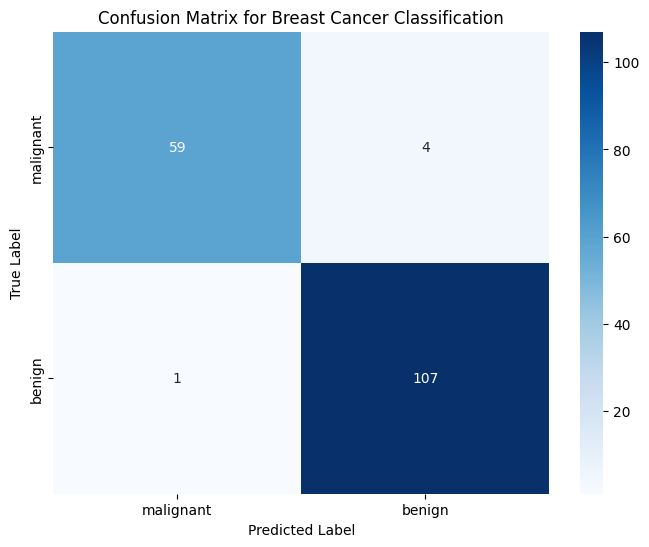

(0.9707602339181286,
 '              precision    recall  f1-score   support\n\n           0       0.98      0.94      0.96        63\n           1       0.96      0.99      0.98       108\n\n    accuracy                           0.97       171\n   macro avg       0.97      0.96      0.97       171\nweighted avg       0.97      0.97      0.97       171\n')

In [59]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Breast Cancer Classification')
plt.show()

accuracy, report

In [69]:
import pandas as pd

# Confusion Matrix Data
cm_data = {'Predicted Malignant': [59, 1], 'Predicted Benign': [4, 107]}
index_labels = ['Actual Malignant', 'Actual Benign']

# Create DataFrame
cm_df = pd.DataFrame(data=cm_data, index=index_labels)

# Display the DataFrame
print(cm_df)

                  Predicted Malignant  Predicted Benign
Actual Malignant                   59                 4
Actual Benign                       1               107


# Confusion Matrix Details:
- True Positive (TP): The upper left cell (59) represents the number of malignant cases correctly predicted as malignant.
- False Negative (FN): The lower left cell (1) indicates the number of malignant cases incorrectly predicted as benign. This is a type II error.
- False Positive (FP): The upper right cell (4) shows the number of benign cases incorrectly predicted as malignant. This is a type I error.
- True Negative (TN): The lower right cell (107) represents the number of benign cases correctly predicted as benign.

# Performance Interpretation:

- High Sensitivity (Recall): The model correctly identified 59 out of 60 malignant cases (59 TP / (59 TP + 1 FN) = 98.33%). This indicates high sensitivity, meaning the model is very effective at identifying malignant cases.
- High Specificity: The model correctly identified 107 out of 111 benign cases (107 TN / (107 TN + 4 FP) = 96.40%). This implies that the model is also effective at identifying benign cases, reducing the risk of false alarms.
- Precision: The precision for malignant cases is very high (59 TP / (59 TP + 4 FP) = 93.65%), indicating that when the model predicts a case as malignant, it is very likely to be correct.
- Overall Accuracy: (59 TP + 107 TN) / (59 TP + 1 FN + 4 FP + 107 TN) = 97.66%. This high accuracy rate suggests that the model is very effective at classifying breast cancer as either benign or malignant across the board.

# Conclusion:

The Random Forest classifier has performed excellently in distinguishing between benign and malignant breast cancer cases, with high values for both sensitivity and specificity. The low number of false negatives is particularly important in a medical context because failing to detect a malignant case can have serious implications for patient treatment and outcomes.

This model’s effectiveness makes it suitable for preliminary screening or as an aid in diagnostic settings, where high sensitivity to malignant cases is crucial. However, continuous monitoring and recalibration with new data are essential to maintain accuracy and adapt to potential changes in data patterns over time.

# **K-Nearest Neighbors (K-NN)**

K-Nearest Neighbors (K-NN) is a simple, easy-to-implement supervised machine learning algorithm that can be used for both classification and regression. It operates based on the principle that similar things exist in close proximity. In other words, it assumes that similar things are near to each other.

# How K-NN Works:

- Distance Calculation: K-NN works by finding the distances between a query and all the examples in the data, selecting the specified number (k) of examples (neighbors) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).
- No Model: Unlike other machine learning algorithms, K-NN does not build a model before making predictions. Instead, it memorizes the training dataset.

# When to Use K-NN:

- Small Dataset: Ideal for use cases with smaller datasets because its performance degrades with the size of the data due to its need to calculate distances for each query.
- Baseline Model: Good as a baseline model to benchmark against more complex algorithms.
- Multi-class Problems: Effective in scenarios with multiple classes.
- Real-time: Suitable for real-time predictions since there's no need to train a model, but at the expense of needing to compute distances in real-time.

# Use Cases:

- Recommendation Systems: Recommending products based on similarity to items previously rated by the user.
- Medical Diagnosis: Classifying patient data based on similarity to known cases.
- Stock Trading: Predicting stock movements based on the similarity of market conditions.

# Sample Python Code:
Here’s an example using the K-NN algorithm for classifying the Iris dataset, using the KNeighborsClassifier from Scikit-Learn.

In [70]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize K-NN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
predictions = knn.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Fetching Stock Data and Applying K-NN

[*********************100%%**********************]  2 of 2 completed
<ipython-input-79-1b5e01f75f7f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices['TSLA_SMA_5'] = close_prices['TSLA'].rolling(window=5).mean()
<ipython-input-79-1b5e01f75f7f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices['AAPL_SMA_5'] = close_prices['AAPL'].rolling(window=5).mean()


Ticker           AAPL       TSLA
Date                            
2020-01-02  75.087502  28.684000
2020-01-03  74.357498  29.534000
2020-01-06  74.949997  30.102667
2020-01-07  74.597504  31.270666
2020-01-08  75.797501  32.809334


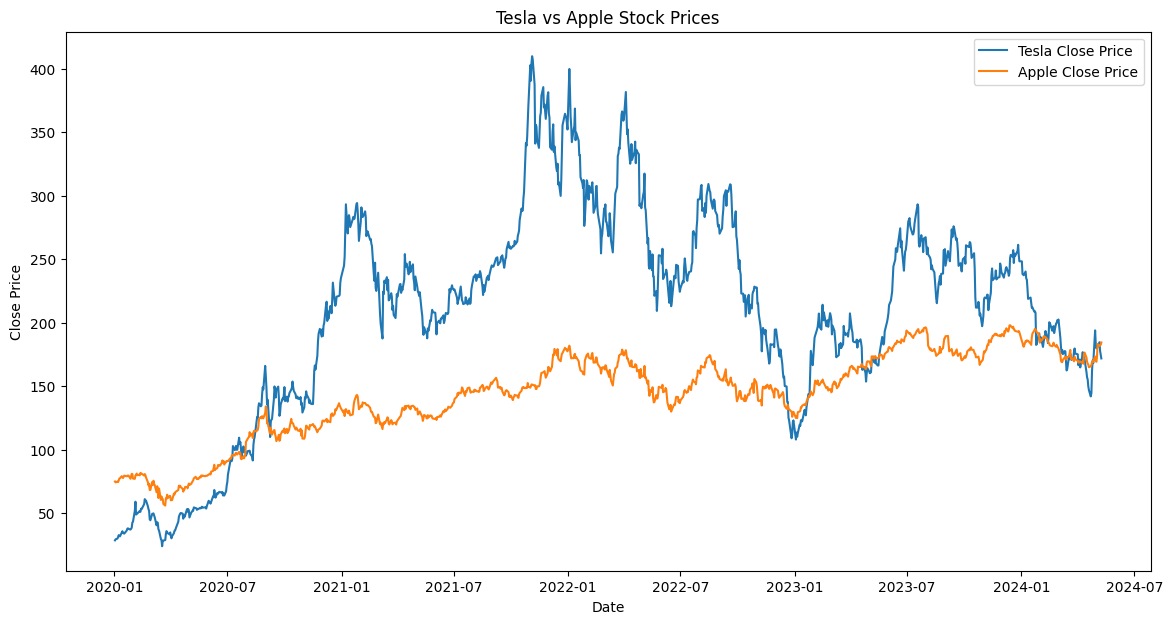

In [79]:
import yfinance as yf
import pandas as pd

# Define the ticker symbols
tickers = ['TSLA', 'AAPL']

# Fetch the historical data
data = yf.download(tickers, start='2020-01-01', end='2024-05-10')

# Close price data
close_prices = data['Close']

# Display the first few rows of the close prices
print(close_prices.head())

# Optionally, if you're looking to perform K-NN or other analyses, you can continue from here
# For example, let's say we use simple moving averages as features
close_prices['TSLA_SMA_5'] = close_prices['TSLA'].rolling(window=5).mean()
close_prices['AAPL_SMA_5'] = close_prices['AAPL'].rolling(window=5).mean()

# Plotting the data for visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(close_prices['TSLA'], label='Tesla Close Price')
plt.plot(close_prices['AAPL'], label='Apple Close Price')
plt.title('Tesla vs Apple Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
